In [2]:
from collections import Counter
from typing import Union, Tuple
from pathlib import Path
import shutil
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

from ipywidgets import IntSlider, interact
%matplotlib inline




In [3]:
data_folder = '/Users/ianapeix/ADA2022/datasets/movie-summaries/'
meta = data_folder + 'movie.metadata.tsv'

In [4]:
character_header = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]
df_characters = pd.read_csv(data_folder + 'character.metadata.tsv', names=character_header, sep='\t')
df_characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [5]:
df_characters = df_characters[df_characters['Actor ethnicity (Freebase ID)'].notnull()]
df_characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450627,23687925,/m/06zmdnc,1952,NaN,1930-08-28,M,1.790,/m/0xnvg,Ben Gazzara,21.0,/m/0j2fmbs,NaN,/m/0428bc
450631,30553937,/m/0g9ts5h,1998-03-07,Tracy,1967-03-16,F,1.746,/m/033tf_,Lauren Graham,30.0,/m/0gw3h6q,/m/0h1gk0m,/m/03c6v3
450643,12476867,/m/02w7zz8,2002,NaN,1980-06-24,F,1.720,/m/041rx,Liane Balaban,21.0,/m/03jpb_5,NaN,/m/02pn4z4
450644,12476867,/m/02w7zz8,2002,NaN,1946-07-02,M,1.740,/m/041rx,Ron Silver,55.0,/m/04hv69s,NaN,/m/03swmf


In [6]:
sum(df_characters['Actor ethnicity (Freebase ID)'].value_counts())

106058

In [7]:
meta_data = pd.read_csv(meta, sep='\t',
                        names=['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])

In [8]:
meta_data

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [9]:
meta_data['Movie countries'].value_counts()

{"/m/09c7w0": "United States of America"}                                                                                                                                                                            30300
{"/m/03rk0": "India"}                                                                                                                                                                                                 8240
{}                                                                                                                                                                                                                    8154
{"/m/07ssc": "United Kingdom"}                                                                                                                                                                                        5343
{"/m/03_3d": "Japan"}                                                                                                       

In [10]:
american_films = meta_data[meta_data['Movie countries'].str.contains("/m/09c7w0")]

In [12]:
american_chars = df_characters.join(meta_data['Movie countries'])
american_chars

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie countries
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"{""/m/09c7w0"": ""United States of America""}"
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"{""/m/05b4w"": ""Norway""}"
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,"{""/m/09c7w0"": ""United States of America""}"
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,"{""/m/03_3d"": ""Japan""}"
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,"{""/m/03rk0"": ""India""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450627,23687925,/m/06zmdnc,1952,NaN,1930-08-28,M,1.790,/m/0xnvg,Ben Gazzara,21.0,/m/0j2fmbs,NaN,/m/0428bc,NaN
450631,30553937,/m/0g9ts5h,1998-03-07,Tracy,1967-03-16,F,1.746,/m/033tf_,Lauren Graham,30.0,/m/0gw3h6q,/m/0h1gk0m,/m/03c6v3,NaN
450643,12476867,/m/02w7zz8,2002,NaN,1980-06-24,F,1.720,/m/041rx,Liane Balaban,21.0,/m/03jpb_5,NaN,/m/02pn4z4,NaN
450644,12476867,/m/02w7zz8,2002,NaN,1946-07-02,M,1.740,/m/041rx,Ron Silver,55.0,/m/04hv69s,NaN,/m/03swmf,NaN


In [13]:
american_chars = american_chars[american_chars['Movie countries'].notnull()]
american_chars

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie countries
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"{""/m/09c7w0"": ""United States of America""}"
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"{""/m/05b4w"": ""Norway""}"
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,"{""/m/09c7w0"": ""United States of America""}"
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,"{""/m/03_3d"": ""Japan""}"
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,"{""/m/03rk0"": ""India""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81717,989630,/m/03x3vc,1996,Hope Altman,1956-03-13,F,1.670,/m/033tf_,Dana Delany,39.0,/m/0gyjfms,/m/0gyjfmv,/m/03x16f,"{""/m/06mzp"": ""Switzerland"", ""/m/03rjj"": ""Italy..."
81720,3384239,/m/098sms,1998,Dr. Wesley McClaren,1952-04-10,M,1.930,/m/033tf_,Steven Seagal,45.0,/m/0k62nq,/m/0gy674w,/m/0hqly,"{""/m/09c7w0"": ""United States of America""}"
81724,3384239,/m/098sms,1998,NaN,1966-02-27,M,1.784,/m/033njm,Donal Logue,31.0,/m/0cg3hm8,NaN,/m/045bs6,"{""/m/03rk0"": ""India""}"
81727,5907567,/m/0fczkw,2002-01-12,Panasa,1979-01-07,F,1.740,/m/0fqp6zk,Bipasha Basu,23.0,/m/0k41tw,/m/0gy63w3,/m/04y0hj,"{""/m/09c7w0"": ""United States of America""}"


In [14]:
american_chars = american_chars[american_chars['Movie countries'].str.contains("/m/09c7w0")]
american_chars

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie countries
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"{""/m/09c7w0"": ""United States of America""}"
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,"{""/m/09c7w0"": ""United States of America""}"
101,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,"{""/m/09c7w0"": ""United States of America"", ""/m/..."
121,156558,/m/014k4y,2001-06-27,Sneed,1962-03-26,M,NaN,/m/0x67,Keith Diamond,39.0,/m/03jnxyv,/m/03jnxyy,/m/02vqm5_,"{""/m/09c7w0"": ""United States of America""}"
125,156558,/m/014k4y,2001-06-27,Patrice,1967-12-11,F,1.750,/m/0x67,Mo'Nique Imes-Jackson,33.0,/m/03jnxw0,/m/03jnxw3,/m/04znsy,"{""/m/09c7w0"": ""United States of America""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81710,7359078,/m/0kv5vz,2005-05-05,Robin,1978-06-02,M,1.740,/m/07hwkr,Justin Long,26.0,/m/02vcx7s,/m/0h122mg,/m/07cjqy,"{""/m/09c7w0"": ""United States of America""}"
81713,36057880,/m/0j_6lfl,1998-02-20,NaN,1965-03-26,M,NaN,/m/075_n6,Prakash Raj,32.0,/m/0mzrsx2,NaN,/m/09tqx3,"{""/m/09c7w0"": ""United States of America""}"
81714,36057880,/m/0j_6lfl,1998-02-20,NaN,1973-06-22,F,NaN,/m/01rv7x,Devayani,24.0,/m/0mztqdf,NaN,/m/025t_m7,"{""/m/09c7w0"": ""United States of America""}"
81720,3384239,/m/098sms,1998,Dr. Wesley McClaren,1952-04-10,M,1.930,/m/033tf_,Steven Seagal,45.0,/m/0k62nq,/m/0gy674w,/m/0hqly,"{""/m/09c7w0"": ""United States of America""}"


In [15]:
american_chars = american_chars[american_chars['Actor ethnicity (Freebase ID)'].notnull()]
american_chars

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie countries
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"{""/m/09c7w0"": ""United States of America""}"
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,"{""/m/09c7w0"": ""United States of America""}"
101,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,"{""/m/09c7w0"": ""United States of America"", ""/m/..."
121,156558,/m/014k4y,2001-06-27,Sneed,1962-03-26,M,NaN,/m/0x67,Keith Diamond,39.0,/m/03jnxyv,/m/03jnxyy,/m/02vqm5_,"{""/m/09c7w0"": ""United States of America""}"
125,156558,/m/014k4y,2001-06-27,Patrice,1967-12-11,F,1.750,/m/0x67,Mo'Nique Imes-Jackson,33.0,/m/03jnxw0,/m/03jnxw3,/m/04znsy,"{""/m/09c7w0"": ""United States of America""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81710,7359078,/m/0kv5vz,2005-05-05,Robin,1978-06-02,M,1.740,/m/07hwkr,Justin Long,26.0,/m/02vcx7s,/m/0h122mg,/m/07cjqy,"{""/m/09c7w0"": ""United States of America""}"
81713,36057880,/m/0j_6lfl,1998-02-20,NaN,1965-03-26,M,NaN,/m/075_n6,Prakash Raj,32.0,/m/0mzrsx2,NaN,/m/09tqx3,"{""/m/09c7w0"": ""United States of America""}"
81714,36057880,/m/0j_6lfl,1998-02-20,NaN,1973-06-22,F,NaN,/m/01rv7x,Devayani,24.0,/m/0mztqdf,NaN,/m/025t_m7,"{""/m/09c7w0"": ""United States of America""}"
81720,3384239,/m/098sms,1998,Dr. Wesley McClaren,1952-04-10,M,1.930,/m/033tf_,Steven Seagal,45.0,/m/0k62nq,/m/0gy674w,/m/0hqly,"{""/m/09c7w0"": ""United States of America""}"


In [16]:
len(df_characters)

106058

In [17]:
chars_extended = pd.read_csv('/Users/ianapeix/Downloads/chars_extended.csv', sep=',')
american = chars_extended[chars_extended['movie_origin'] == 'United States of America']
american

,movie_freebase_id,movie_id,movie_name,movie_genre,movie_origin,movie_release,box_office_value,director_id,director_name,director_gender,...,cast_3_country,cast_3_birth,cast_3_age_at_release,cast_id_4,cast_4_name,cast_4_gender,cast_4_country,cast_4_birth,cast_4_age_at_release,movie_imdb_id
0,/m/02rjv0t,Q1000394,This Modern Age,drama film,United States of America,1931-08-29,NaN,Q1985392,Nick Grinde,male,...,France,1878-06-02,53.0,Q2831060,Albert Conti,male,United States of America,1887-01-29,44.0,tt0022478
4,/m/0f1r9p,Q1000826,Guns of the Magnificent Seven,Western film,United States of America,1969-01-01,NaN,Q450601,Paul Wendkos,male,...,United States of America,1914-07-24,55.0,Q465643,George Rigaud,male,Argentina,1905-08-11,64.0,tt0064395
8,/m/03d963m,Q1001996,Buffalo Dance,documentary film,United States of America,1894-01-01,NaN,Q465350,William Kennedy Dickson,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0309402
9,/m/0c7vj8,Q1001943,"Buffalo Bill and the Indians, or Sitting Bull'...",Western film,United States of America,1976-06-24,NaN,Q55163,Robert Altman,male,...,United States of America,1939-05-13,37.0,Q537322,Will Sampson,male,United States of America,1933-09-27,43.0,tt0074254
10,/m/01fxc3,Q1002142,Buffalo '66,romantic comedy,United States of America,1998-01-01,NaN,Q362353,Vincent Gallo,male,...,United States of America,1961-04-11,37.0,Q178552,Mickey Rourke,male,United States of America,1952-09-16,46.0,tt0118789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75187,/m/07zsmk,Q998219,The Benchwarmers,buddy film,United States of America,2007-01-01,NaN,Q518868,Dennis Dugan,male,...,United States of America,1957-07-21,50.0,Q236537,Molly Sims,female,United States of America,1973-05-25,34.0,tt0437863
75188,/m/0806nm,Q999370,Buck Rogers in the 25th Century,science fiction television series,United States of America,1979-03-30,NaN,NaN,NaN,NaN,...,United Kingdom,1903-05-12,NaN,Q2847606,Thom Christopher,male,United States of America,1940-10-05,NaN,tt0078579
75189,/m/08njw9,Q998565,Magic Town,romantic comedy,United States of America,1947-01-01,NaN,Q290962,William Augustus Wellman,male,...,Canada,1883-11-19,64.0,Q1704485,Wallace Ford,male,United Kingdom,1898-02-12,49.0,tt0039595
75191,/m/0b7gjf,Q999353,Buck Privates,comedy film,United States of America,1941-01-01,NaN,Q327493,Arthur Lubin,male,...,NaN,NaN,NaN,Q972398,The Andrews Sisters,NaN,United States of America,1925-01-01,16.0,tt0033436


In [18]:
american.rename(columns = {'movie_freebase_id':'Freebase movie ID'}, inplace = True)
american

/var/folders/3c/mf6hd5hn0_bgp2m5ybnmsy8r0000gn/T/ipykernel_37705/4061315340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.rename(columns = {'movie_freebase_id':'Freebase movie ID'}, inplace = True)


,Freebase movie ID,movie_id,movie_name,movie_genre,movie_origin,movie_release,box_office_value,director_id,director_name,director_gender,...,cast_3_country,cast_3_birth,cast_3_age_at_release,cast_id_4,cast_4_name,cast_4_gender,cast_4_country,cast_4_birth,cast_4_age_at_release,movie_imdb_id
0,/m/02rjv0t,Q1000394,This Modern Age,drama film,United States of America,1931-08-29,NaN,Q1985392,Nick Grinde,male,...,France,1878-06-02,53.0,Q2831060,Albert Conti,male,United States of America,1887-01-29,44.0,tt0022478
4,/m/0f1r9p,Q1000826,Guns of the Magnificent Seven,Western film,United States of America,1969-01-01,NaN,Q450601,Paul Wendkos,male,...,United States of America,1914-07-24,55.0,Q465643,George Rigaud,male,Argentina,1905-08-11,64.0,tt0064395
8,/m/03d963m,Q1001996,Buffalo Dance,documentary film,United States of America,1894-01-01,NaN,Q465350,William Kennedy Dickson,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0309402
9,/m/0c7vj8,Q1001943,"Buffalo Bill and the Indians, or Sitting Bull'...",Western film,United States of America,1976-06-24,NaN,Q55163,Robert Altman,male,...,United States of America,1939-05-13,37.0,Q537322,Will Sampson,male,United States of America,1933-09-27,43.0,tt0074254
10,/m/01fxc3,Q1002142,Buffalo '66,romantic comedy,United States of America,1998-01-01,NaN,Q362353,Vincent Gallo,male,...,United States of America,1961-04-11,37.0,Q178552,Mickey Rourke,male,United States of America,1952-09-16,46.0,tt0118789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75187,/m/07zsmk,Q998219,The Benchwarmers,buddy film,United States of America,2007-01-01,NaN,Q518868,Dennis Dugan,male,...,United States of America,1957-07-21,50.0,Q236537,Molly Sims,female,United States of America,1973-05-25,34.0,tt0437863
75188,/m/0806nm,Q999370,Buck Rogers in the 25th Century,science fiction television series,United States of America,1979-03-30,NaN,NaN,NaN,NaN,...,United Kingdom,1903-05-12,NaN,Q2847606,Thom Christopher,male,United States of America,1940-10-05,NaN,tt0078579
75189,/m/08njw9,Q998565,Magic Town,romantic comedy,United States of America,1947-01-01,NaN,Q290962,William Augustus Wellman,male,...,Canada,1883-11-19,64.0,Q1704485,Wallace Ford,male,United Kingdom,1898-02-12,49.0,tt0039595
75191,/m/0b7gjf,Q999353,Buck Privates,comedy film,United States of America,1941-01-01,NaN,Q327493,Arthur Lubin,male,...,NaN,NaN,NaN,Q972398,The Andrews Sisters,NaN,United States of America,1925-01-01,16.0,tt0033436


In [19]:
USA_char = df_characters.merge(american, how = 'inner')
USA_char

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,...,cast_3_country,cast_3_birth,cast_3_age_at_release,cast_id_4,cast_4_name,cast_4_gender,cast_4_country,cast_4_birth,cast_4_age_at_release,movie_imdb_id
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,United States of America,1949-05-26,52.0,Q233347,Clea DuVall,female,United States of America,1977-09-25,24.0,tt0228333
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,United States of America,1949-05-26,52.0,Q233347,Clea DuVall,female,United States of America,1977-09-25,24.0,tt0228333
2,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,...,United States of America,1949-05-26,52.0,Q233347,Clea DuVall,female,United States of America,1977-09-25,24.0,tt0228333
3,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,...,United States of America,1949-05-26,52.0,Q233347,Clea DuVall,female,United States of America,1977-09-25,24.0,tt0228333
4,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0245916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53464,22330502,/m/05sync6,1931-01-31,Yvonne Valbret,1905-09-18,F,1.702,/m/06mvq,Greta Garbo,25.0,...,United States of America,1889-07-15,42.0,Q439668,Karen Morley,female,United States of America,1909-12-12,22.0,tt0022001
53465,21772949,/m/05mspcd,1948-04,NaN,1913-12-25,M,NaN,/m/041rx,Tony Martin,NaN,...,Austria-Hungary,1901-02-18,47.0,Q2661773,Märta Torén,female,Sweden,1926-05-21,22.0,tt0040214
53466,21772949,/m/05mspcd,1948-04,Slimane,1904-06-26,M,1.600,/m/041rx,Peter Lorre,NaN,...,Austria-Hungary,1901-02-18,47.0,Q2661773,Märta Torén,female,Sweden,1926-05-21,22.0,tt0040214
53467,21772949,/m/05mspcd,1948-04,Katherine Dunham Group Dancer,1927-01-17,F,1.630,/m/0x67,Eartha Kitt,NaN,...,Austria-Hungary,1901-02-18,47.0,Q2661773,Märta Torén,female,Sweden,1926-05-21,22.0,tt0040214


In [20]:
usa_ethnics = pd.read_csv('/Users/ianapeix/ADA2022/ethnicity_complete_csv.csv', sep=',')
usa_ethnics.drop('Actor ethnicity (Freebase ID)', axis=1, inplace=True)
usa_ethnics

,ID,Ethnicity String,Race
0,/m/0dryh9k,Indians,Asian and Pacific Islander
1,/m/0x67,African Americans,Black
2,/m/041rx,Jewish people,NaN
3,/m/02w7gg,English people,White
4,/m/033tf_,Irish Americans,White
...,...,...,...
474,/m/043_z22,/m/043_z22,NaN
475,/m/03x_fq7,Indian diaspora,NaN
476,/m/01hphz,Ho-Chunk,NaN
477,/m/033fjj,Han Chinese people,NaN


In [21]:
merged_df = pd.merge(USA_char, usa_ethnics, left_on='Actor ethnicity (Freebase ID)', right_on='ID')
merged_df = merged_df[['Actor ethnicity (Freebase ID)','Ethnicity String','ID','Race','Movie release date']]
merged_df

,Actor ethnicity (Freebase ID),Ethnicity String,ID,Race,Movie release date
0,/m/044038p,/m/044038p,/m/044038p,Other,2001-08-24
1,/m/044038p,/m/044038p,/m/044038p,Other,2007-09-14
2,/m/044038p,/m/044038p,/m/044038p,Other,2010
3,/m/044038p,/m/044038p,/m/044038p,Other,1995-12-27
4,/m/044038p,/m/044038p,/m/044038p,Other,1997
...,...,...,...,...,...
53464,/m/0222hg,Jats,/m/0222hg,Asian and Pacific Islander,2006-04-11
53465,/m/02pzb09,Castilians,/m/02pzb09,NaN,1986-08-28
53466,/m/04wysy,Agrawal,/m/04wysy,NaN,1988-10-07
53467,/m/0cm7w1,Bihari people,/m/0cm7w1,Asian and Pacific Islander,2008


In [47]:
merged_df['Race'].value_counts()

White                                27395
Black                                 9083
Asian and Pacific Islander            1820
Hispanic                              1582
Other                                 1260
American Indian Eskimo and Aleut       218
Name: Race, dtype: int64

In [23]:
merged_df = merged_df[merged_df['Movie release date'].notna()]
merged_df['Year'] = pd.to_numeric(merged_df['Movie release date'].str[:4])
merged_df = merged_df[(merged_df['Year'] > 1800) & (merged_df['Year'] < 2018)]
merged_df

/var/folders/3c/mf6hd5hn0_bgp2m5ybnmsy8r0000gn/T/ipykernel_37705/2797279762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Year'] = pd.to_numeric(merged_df['Movie release date'].str[:4])


,Actor ethnicity (Freebase ID),Ethnicity String,ID,Race,Movie release date,Year
0,/m/044038p,/m/044038p,/m/044038p,Other,2001-08-24,2001
1,/m/044038p,/m/044038p,/m/044038p,Other,2007-09-14,2007
2,/m/044038p,/m/044038p,/m/044038p,Other,2010,2010
3,/m/044038p,/m/044038p,/m/044038p,Other,1995-12-27,1995
4,/m/044038p,/m/044038p,/m/044038p,Other,1997,1997
...,...,...,...,...,...,...
53464,/m/0222hg,Jats,/m/0222hg,Asian and Pacific Islander,2006-04-11,2006
53465,/m/02pzb09,Castilians,/m/02pzb09,NaN,1986-08-28,1986
53466,/m/04wysy,Agrawal,/m/04wysy,NaN,1988-10-07,1988
53467,/m/0cm7w1,Bihari people,/m/0cm7w1,Asian and Pacific Islander,2008,2008


<AxesSubplot:title={'center':'Number of actors by year per sex'}>

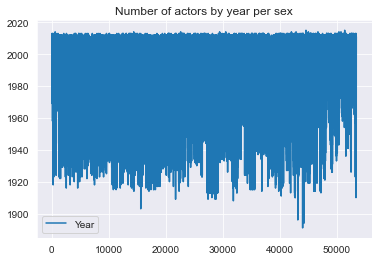

In [24]:
df_plot = merged_df[['Race','Year']]
df_plot.plot(title="Number of actors by year per sex")

In [25]:
fig = plt.figure(figsize=(12, 12))
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 864x864 with 0 Axes>

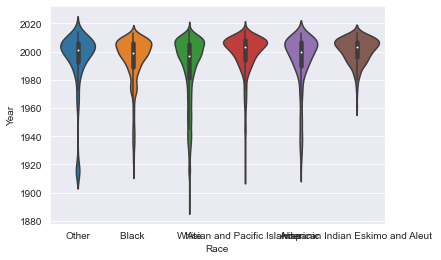

In [26]:
ax = sns.violinplot(x="Race", y="Year", data=df_plot)

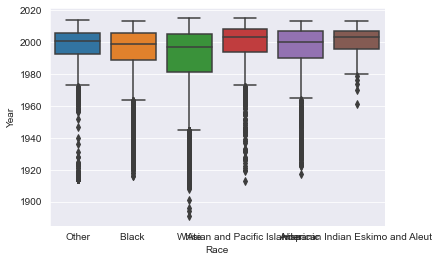

In [27]:
ax = sns.boxplot(x="Race", y="Year", data=df_plot)

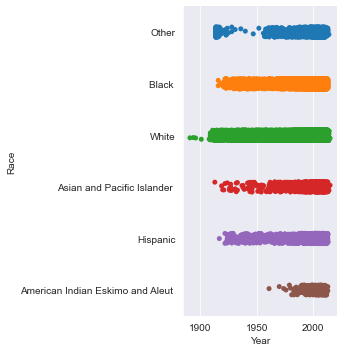

In [28]:
ax = sns.catplot(x="Year", y="Race", data=df_plot)

AttributeError: 'Rectangle' object has no property 'stacked'

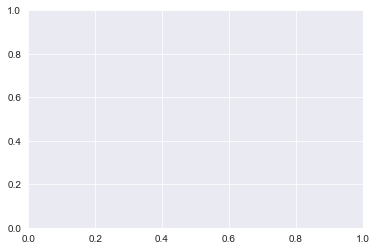

In [29]:
ax = sns.barplot(x="Year", y="Race", data=df_plot, stacked= True)

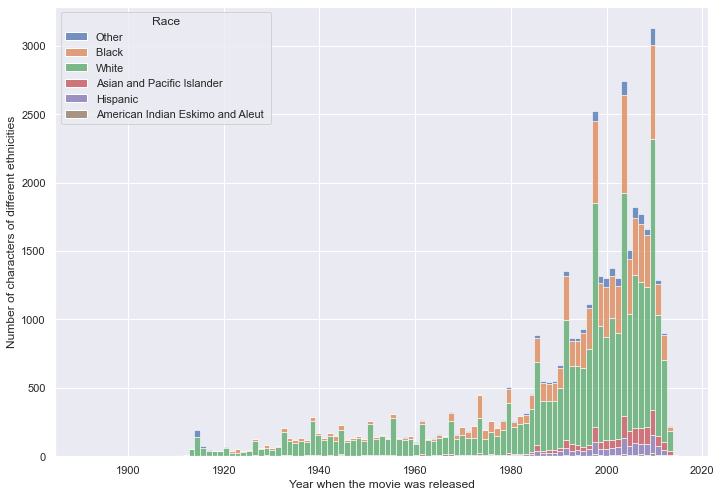

In [70]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(df_plot, x='Year', hue='Race', multiple='stack', stat='count')
ax.set(xlabel='Year when the movie was released', ylabel='Number of characters of different ethnicities')
plt.show()


<AxesSubplot:xlabel='Year', ylabel='Probability'>

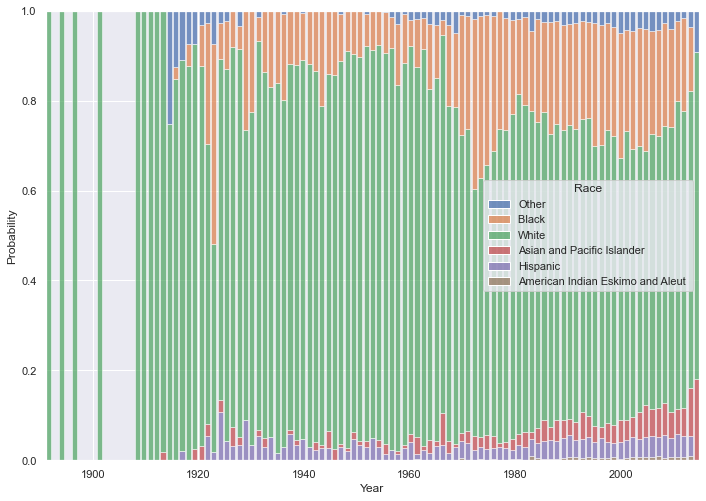

In [71]:
sns.histplot(df_plot, x="Year", hue="Race", stat="probability", multiple="fill", shrink=.8)

In [34]:
hispanic = merged_df[merged_df['Race']=='Hispanic']
hispanic

,Actor ethnicity (Freebase ID),Ethnicity String,ID,Race,Movie release date,Year
29202,/m/09v5bdn,Puerto Ricans,/m/09v5bdn,Hispanic,1994-10,1994
29203,/m/09v5bdn,Puerto Ricans,/m/09v5bdn,Hispanic,1996-08-28,1996
29204,/m/09v5bdn,Puerto Ricans,/m/09v5bdn,Hispanic,1965-02-15,1965
29205,/m/09v5bdn,Puerto Ricans,/m/09v5bdn,Hispanic,2006,2006
29206,/m/09v5bdn,Puerto Ricans,/m/09v5bdn,Hispanic,1953-03-06,1953
...,...,...,...,...,...,...
52646,/m/09gk_6h,Argentines,/m/09gk_6h,Hispanic,2005,2005
52647,/m/09gk_6h,Argentines,/m/09gk_6h,Hispanic,2008-06-12,2008
52648,/m/09gk_6h,Argentines,/m/09gk_6h,Hispanic,2000-10-18,2000
52649,/m/09gk_6h,Argentines,/m/09gk_6h,Hispanic,2010-01-20,2010


In [39]:
merged_df

,Actor ethnicity (Freebase ID),Ethnicity String,ID,Race,Movie release date,Year
0,/m/044038p,/m/044038p,/m/044038p,Other,2001-08-24,2001
1,/m/044038p,/m/044038p,/m/044038p,Other,2007-09-14,2007
2,/m/044038p,/m/044038p,/m/044038p,Other,2010,2010
3,/m/044038p,/m/044038p,/m/044038p,Other,1995-12-27,1995
4,/m/044038p,/m/044038p,/m/044038p,Other,1997,1997
...,...,...,...,...,...,...
53464,/m/0222hg,Jats,/m/0222hg,Asian and Pacific Islander,2006-04-11,2006
53465,/m/02pzb09,Castilians,/m/02pzb09,NaN,1986-08-28,1986
53466,/m/04wysy,Agrawal,/m/04wysy,NaN,1988-10-07,1988
53467,/m/0cm7w1,Bihari people,/m/0cm7w1,Asian and Pacific Islander,2008,2008


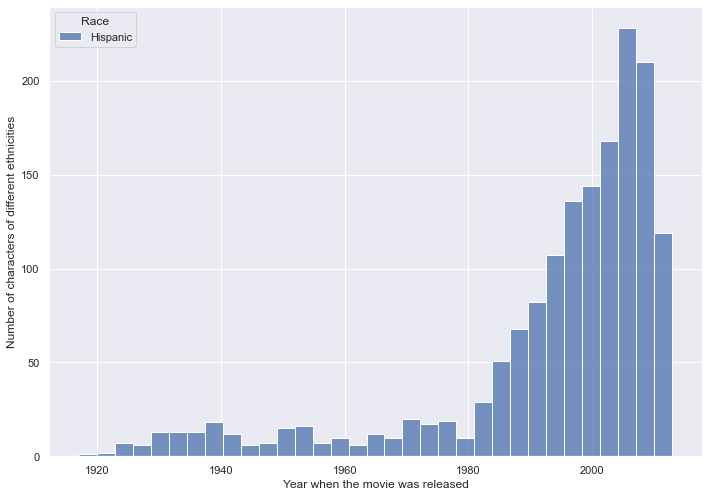

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(hispanic, x='Year', hue='Race', multiple='stack')
ax.set(xlabel='Year when the movie was released', ylabel='Number of characters of different ethnicities')
plt.show()

In [33]:
usa_census = pd.read_csv('/Users/ianapeix/ADA2022/USADemographic.csv', sep=',')
usa_census

,Race/Ethnic Group,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,Total Population,23191876,31443321.0,38558371.0,50155783,62947714.0,75994575,91972266,105710620,122775046,131669275,150697361,179323175,203210158,226545805,248709873,281421906,308745538,331449281
1,White,19553068,26922537.0,33589377.0,43402970,55101258.0,66809196,81731957,94820915,110286740,118214870,134942028,158831732,178119221,188371622,199686070,211460626,223553265,204277273
2,Black,3638808,4441830.0,4880009.0,6580793,7488676.0,8833994,9827763,10463131,11891143,12865518,15042286,18871831,22539362,26495025,29986060,34658190,38929319,41104200
3,American Indian Eskimo and Aleut,0,44021.0,25731.0,66407,248253.0,237196,265683,244437,332397,333969,343410,551669,795110,1420400,1959234,2475956,2932248,3727135
4,Asian and Pacific Islander,0,34933.0,63254.0,105613,109527.0,114189,146863,182137,264766,254918,321033,980337,1526401,3500439,7273662,10641833,15214265,20576015
5,Hispanic (of any race),116943,155000.0,NaN,393555,NaN,503189,797994,1286154,1286154,2021820,3231409,5814784,8920940,14608673,22354059,35305818,50477594,62080044
6,Non-Hispanic White,19438451,NaN,NaN,43065679,NaN,66374317,81043248,93604612,93604612,116261189,131805405,153217498,169622593,180256366,188128296,194552774,196817552,191697647
7,Other,0,0.0,0.0,0,0.0,0,0,0,0,0,48604,87606,230064,6758319,9804847,22185301,28116441,61764658


In [58]:
black = merged_df[merged_df['Ethnicity String'] == 'African Americans']
black

,Actor ethnicity (Freebase ID),Ethnicity String,ID,Race,Movie release date,Year
1144,/m/0x67,African Americans,/m/0x67,Black,2001-08-24,2001
1145,/m/0x67,African Americans,/m/0x67,Black,2001-08-24,2001
1146,/m/0x67,African Americans,/m/0x67,Black,2000-02-16,2000
1147,/m/0x67,African Americans,/m/0x67,Black,2001-06-27,2001
1148,/m/0x67,African Americans,/m/0x67,Black,2001-06-27,2001
...,...,...,...,...,...,...
10318,/m/0x67,African Americans,/m/0x67,Black,2000,2000
10319,/m/0x67,African Americans,/m/0x67,Black,2000,2000
10320,/m/0x67,African Americans,/m/0x67,Black,2000,2000
10321,/m/0x67,African Americans,/m/0x67,Black,2011-03-11,2011


In [61]:
jewish = merged_df[merged_df['Ethnicity String'] == 'Jewish people']
jewish

,Actor ethnicity (Freebase ID),Ethnicity String,ID,Race,Movie release date,Year
10330,/m/041rx,Jewish people,/m/041rx,NaN,2006,2006
10331,/m/041rx,Jewish people,/m/041rx,NaN,1938-07-05,1938
10332,/m/041rx,Jewish people,/m/041rx,NaN,1982,1982
10333,/m/041rx,Jewish people,/m/041rx,NaN,1989-04-28,1989
10334,/m/041rx,Jewish people,/m/041rx,NaN,1939,1939
...,...,...,...,...,...,...
18659,/m/041rx,Jewish people,/m/041rx,NaN,1997-01-10,1997
18660,/m/041rx,Jewish people,/m/041rx,NaN,2009-01-20,2009
18661,/m/041rx,Jewish people,/m/041rx,NaN,1996-10-25,1996
18662,/m/041rx,Jewish people,/m/041rx,NaN,1948-04,1948


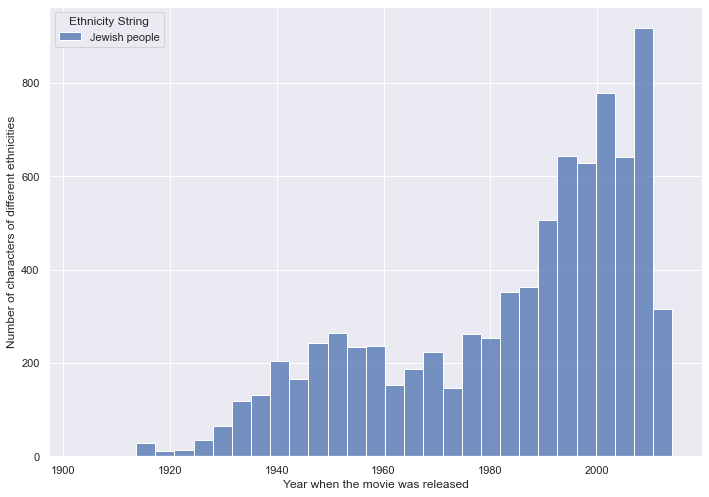

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(jewish, x='Year', hue='Ethnicity String', multiple='stack')
ax.set(xlabel='Year when the movie was released', ylabel='Number of characters of different ethnicities')
plt.show()

In [54]:
merged_df['Race'].value_counts()

White                                27395
Black                                 9083
Asian and Pacific Islander            1820
Hispanic                              1582
Other                                 1260
American Indian Eskimo and Aleut       218
Name: Race, dtype: int64

In [ ]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(df_plot, x='Year', hue='Race', multiple='stack')
ax.set(xlabel='Year when the movie was released', ylabel='Number of characters of different ethnicities')
plt.show()